# РОБОТА із ЗОБРАЖЕННЯМИ 
## Файл: Image_04_002
## Лінійна фільтрація. Фільтр Гауса

In [5]:
## Завантаження пакетів
import numpy as np
import matplotlib.pyplot as plt
import skimage.io as io
from numpy.random import Generator, MT19937
plt.rcParams['font.size'] = 10

#### Ядро Гауса

Sigma 1.0 Coef 0 0 =  0.15915494309189535


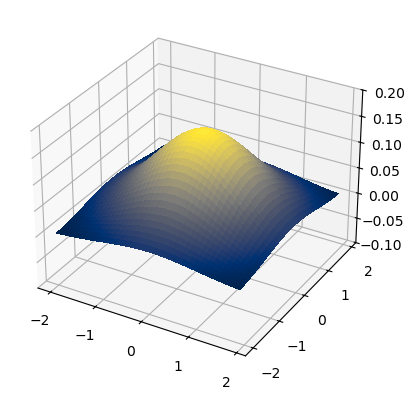

In [6]:
# This import registers the 3D projection, but is otherwise unused.
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import
from matplotlib import cm
from matplotlib.colors import LightSource

fig = plt.figure()

ax = fig.add_subplot(1, 1, 1, projection='3d')

X = np.arange(-2, 2, .1)
Y = np.arange(-2, 2, .1)
X, Y = np.meshgrid(X, Y)

Sigma = 1.0
#Sigma = .85
Sigm2 = 2*Sigma**2
Coef = 1.0 / (np.pi*Sigm2)

print ('Sigma', Sigma,'Coef 0 0 = ',Coef )

Z = Coef*np.exp (-((X)**2+(Y)**2)/Sigm2)

surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.cividis,
                        linewidth=0, antialiased=False)

ax.set_zlim3d(-0.1, 0.2)

plt.show()


##  Чорний квадрат

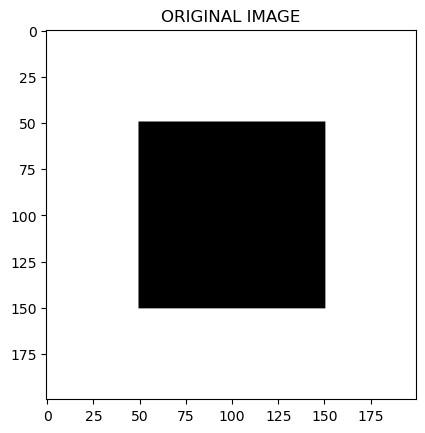

In [7]:
rows_num = 200 ## кількість рядків
clms_num = 200 ## кількість колонок
test_im = np.full ((rows_num, clms_num, 3), (1., 1., 1.) , dtype=np.float32)
## 
xU =  50  ; yL =  50
xD =  150 ; yR = 150
for i in  range (xU, xD+1, 1):
    for j in  range (yL, yR+1, 1):
        test_im [i, j, : ] = [0.0, 0.0, 0.0]

# print (np.max(test_im))

rows_num = test_im.shape[0] ## кількість рядків
clms_num = test_im.shape[1] ## кількість колонок
pix_num = rows_num*clms_num ## кількість пікселів


bins = 256 ## кількість рівнів яскравості
        
plt.title('ORIGINAL IMAGE')
plt.imshow(test_im)
plt.show()

MASK SHAPE (5, 5, 1) MASK SIZE 25
Сума коэфіцієнтов 0.999
0.9990001


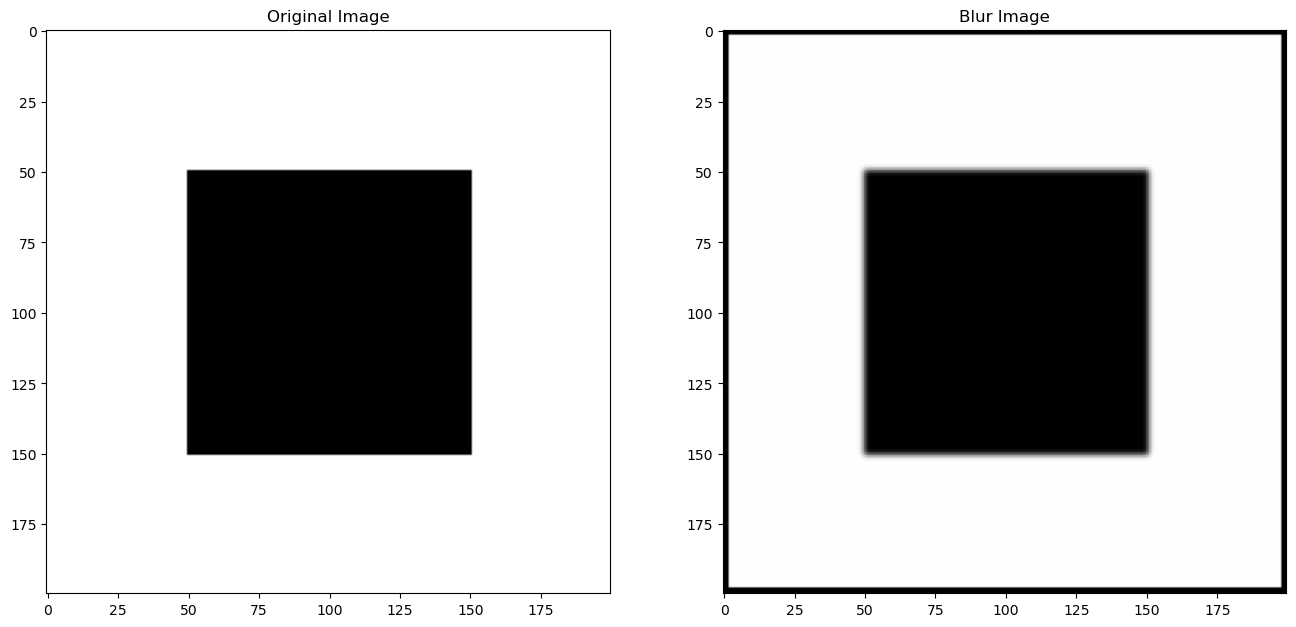

In [8]:
mask_row = 5
mask_clm = 5
mask_blur = np.zeros ( (mask_row, mask_clm, 1), dtype=np.float32)
print ('MASK SHAPE', mask_blur.shape, 'MASK SIZE', mask_row*mask_clm)
mask_blur[0,0] = mask_blur[4,0] = mask_blur[0,4] = mask_blur[4,4] = 0.004
mask_blur[0,1] = mask_blur[0,3] = mask_blur[1,0] = mask_blur[1,4] = mask_blur[3,0] = mask_blur[3,4] = mask_blur[4,1] = mask_blur[4,3] = 0.014
mask_blur[0,2] = mask_blur[2,0] = mask_blur[2,4] = mask_blur[4,2] = 0.022
mask_blur[1,1] = mask_blur[1,3] = mask_blur[3,1] = mask_blur[3,3] = 0.059
mask_blur[1,2] = mask_blur[2,1] = mask_blur[2,3] = mask_blur[3,2] = 0.097
mask_blur[2,2] = 0.159

#mask_blur[0,0] = mask_blur[4,0] = mask_blur[0,4] = mask_blur[4,4] = 0.000789
#mask_blur[0,1] = mask_blur[0,3] = mask_blur[1,0] = mask_blur[1,4] = mask_blur[3,0] = mask_blur[3,4] = mask_blur[4,1] = mask_blur[4,3] = 0.006581
#mask_blur[0,2] = mask_blur[2,0] = mask_blur[2,4] = mask_blur[4,2] = 0.013347
#mask_blur[1,1] = mask_blur[1,3] = mask_blur[3,1] = mask_blur[3,3] = 0.054901
#mask_blur[1,2] = mask_blur[2,1] = mask_blur[2,3] = mask_blur[3,2] = 0.111345
#mask_blur[2,2] = 0.225821

# MASK TEST
f_sum = np.sum(mask_blur)
print ('Сума коэфіцієнтов', f_sum)

filtr_im_blur = np.zeros ( (rows_num, clms_num, 3), dtype=np.float32)
# print ('Do',np.max(filtr_im_blur))

# filtr_im_blur = test_im.copy()

for i in  range (2, (rows_num-2), 1):
    for j in  range (2, (clms_num-2), 1):
        #filtr_im_blur [i, j, :] = 0
        for l in range (mask_row):
            for k in range (mask_clm):
                # fiter image
                filtr_im_blur [i, j, :] += mask_blur[l,k]*test_im [i-(2-k), j-(2-l), :]

print (np.max(filtr_im_blur))

## СУМІСНИЙ ОРИГІНАЛЬНОГО та ПЕРЕТВОРЕНОГО ЗОБРАЖЕННЯ
fig, axes = plt.subplots(1, 2, figsize=(16, 8))
ax = axes.ravel()
ax[0].imshow(test_im)
ax[0].set_title("Original Image")
ax[1].imshow(filtr_im_blur)
ax[1].set_title("Blur Image")
plt.show()



In [9]:
## Завантаження файлу зображення
path = './IMAGES/'
filename = 'Im_04_01.png'
test_im = io.imread(path + filename)
## Визначення стркутури та розміру зображення
print ('MAX value', np.max(test_im))
print ('IMAGE SHAPE', test_im.shape, 'IMAGE SIZE', test_im.size)
## rows_num = len(test_im)
rows_num = test_im.shape[0] ## кількість рядків
clms_num = test_im.shape[1] ## кількість колонок
pix_num = rows_num*clms_num ## кількість пікселів
bins = 256 ## кількість рівнів яскравості
bins_flt = np.float32(bins) ## кількість рівнів яскравості в форматі float
print ('ROWS NUMBER', rows_num, 'CLMS NUMBER', clms_num, 'PIX NUMBER', pix_num, 'Bins',bins)

MAX value 248
IMAGE SHAPE (200, 512, 3) IMAGE SIZE 307200
ROWS NUMBER 200 CLMS NUMBER 512 PIX NUMBER 102400 Bins 256


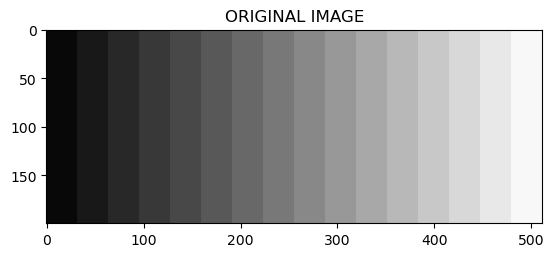

In [10]:
## Вивід оррігінального зображення  та зображення з шумомо 
plt.title('ORIGINAL IMAGE')
plt.imshow(test_im)
plt.show()

##  Використання оператора Гауса

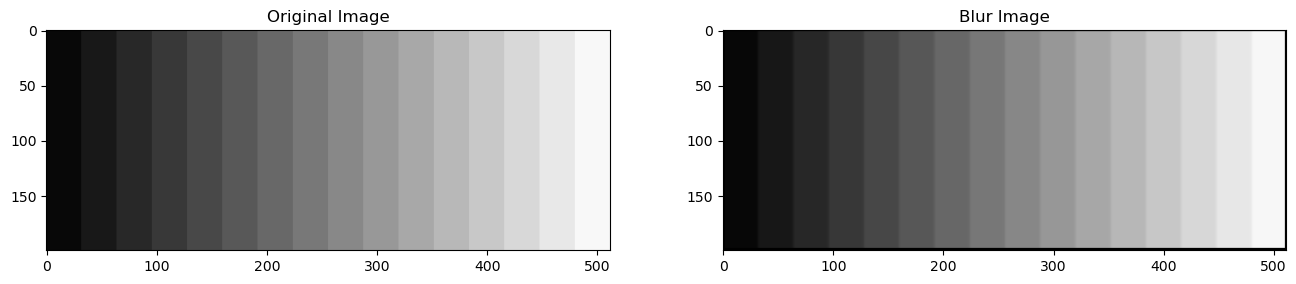

In [11]:
test_im_fl  = np.zeros ( (rows_num, clms_num, 3), dtype=np.float32)
test_im_fl[: ,: ,:] = test_im [: ,: ,:] /255.0
filtr_im_blur1 = np.zeros ( (rows_num, clms_num, 3), dtype=np.float32)
# filtr_im_blur1 = test_im_fl.copy()


for i in  range (2, (rows_num-2), 1):
    for j in  range (2, (clms_num-2), 1):
        filtr_im_blur1 [i, j, :] = .0
        for l in range (mask_row):
            for k in range (mask_clm):
                # fiter image
                filtr_im_blur1 [i, j, :] += mask_blur[l,k]*test_im_fl [i-(2-k), j-(2-l), :]
        
## СУМІСНИЙ ОРИГІНАЛЬНОГО та ПЕРЕТВОРЕНОГО ЗОБРАЖЕННЯ
fig, axes = plt.subplots(1, 2, figsize=(16, 8))
ax = axes.ravel()
ax[0].imshow(test_im)
ax[0].set_title("Original Image")
ax[1].imshow(filtr_im_blur1)
ax[1].set_title("Blur Image")
plt.show()


##  Використання оператора Гауса (ЛЕНА)
##  Кольорове зображення

In [13]:
## Завантаження файлу зображення
path = './IMAGES/'
filename = 'Lenna.png' 
test_im_lena = io.imread(path + filename)

## Визначення стркутури та розміру зображення
print ('IMAGE SHAPE', test_im_lena.shape, 'IMAGE SIZE', test_im.size)
rows_num = test_im_lena.shape[0] ## кількість рядків
clms_num = test_im_lena.shape[1] ## кількість колонок
pix_num = rows_num*clms_num ## кількість пікселів
bins = 256 ## кількість рівнів яскравості
print ('ROWS NUMBER', rows_num, 'CLMS NUMBER', clms_num, 'PIX NUMBER', pix_num, 'Bins',bins)

## Додаємо СІЛЬ
test_im_lena [50,50,:] = [255,255,255] 
test_im_lena [51,50,:] = [255,255,255] 
test_im_lena [50,51,:] = [255,255,255] 
test_im_lena [51,51,:] = [255,255,255] 

IMAGE SHAPE (512, 512, 3) IMAGE SIZE 307200
ROWS NUMBER 512 CLMS NUMBER 512 PIX NUMBER 262144 Bins 256


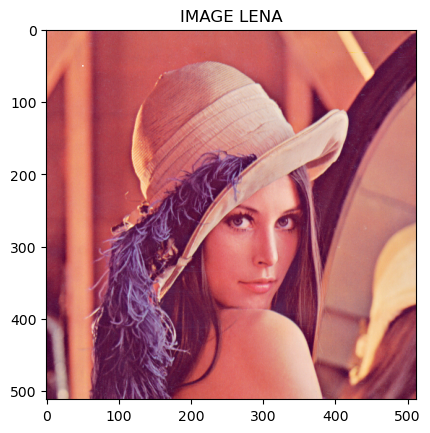

In [14]:
## Вивід оррігінального зображення на екран
plt.title('IMAGE LENA')
plt.imshow(test_im_lena)
plt.show()

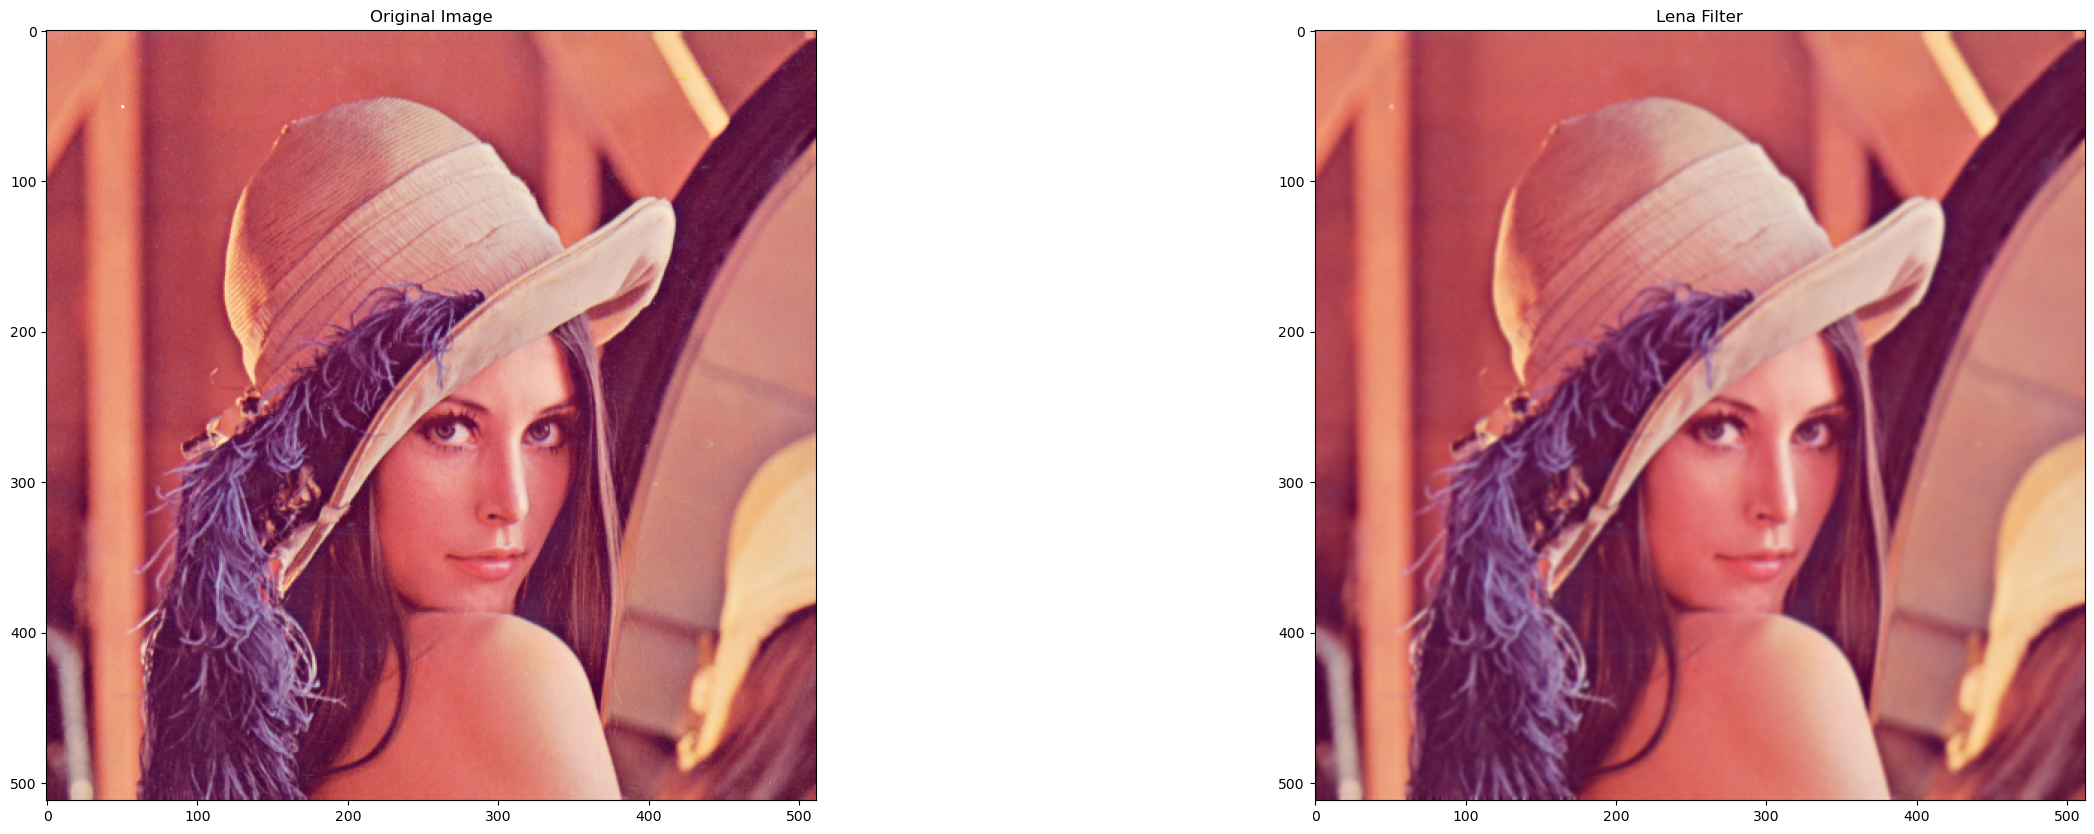

In [15]:
lena_im_fl  = np.zeros ( (rows_num, clms_num, 3), dtype=np.float32)
lena_im_fl [: ,: ,:] = test_im_lena [: ,: ,:] /255.0


lena_im_blur = np.zeros ( (rows_num, clms_num, 3), dtype=np.float32)
lena_im_blur = lena_im_fl.copy()

for i in  range (2, (rows_num-2), 1):
    for j in  range (2, (clms_num-2), 1):
        lena_im_blur  [i, j, :] = .0
        for l in range (mask_row):
            for k in range (mask_clm):
                # fiter image
                lena_im_blur [i, j, :] += mask_blur[l,k]*lena_im_fl [i-(2-k), j-(2-l), :]

        
## СУМІСНИЙ ОРИГІНАЛЬНОГО та ПЕРЕТВОРЕНОГО ЗОБРАЖЕННЯ
fig, axes = plt.subplots(1, 2, figsize=(30, 10))
ax = axes.ravel()
ax[0].imshow(lena_im_fl)
ax[0].set_title("Original Image")
ax[1].imshow(lena_im_blur)
ax[1].set_title("Lena Filter")
plt.show()